In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exam_df = pd.read_csv('datasets/exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
50,female,group C,master's degree,free/reduced,none,44,66,61
31,male,group C,high school,standard,completed,83,84,87
93,female,group C,high school,standard,none,81,88,90
16,female,group D,some college,standard,none,86,100,100
97,male,group B,bachelor's degree,free/reduced,none,67,74,72


In [3]:
exam_df.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,66.950000,70.090000,68.670000
std,15.838436,15.021261,15.753823
min,17.000000,18.000000,26.000000
25%,57.000000,61.000000,59.500000
50%,67.000000,70.000000,70.000000
75%,77.750000,80.000000,77.250000
max,100.000000,100.000000,100.000000


In [4]:
from sklearn import preprocessing

exam_df[['math score']] = preprocessing.scale(exam_df[['math score']].astype('float64'))
exam_df[['reading score']] = preprocessing.scale(exam_df[['reading score']].astype('float64'))
exam_df[['writing score']] = preprocessing.scale(exam_df[['writing score']].astype('float64'))

In [5]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,associate's degree,standard,none,-0.758295,-0.608191,-0.680708
1,female,group B,high school,free/reduced,none,-0.504472,-0.006022,-0.170336
2,female,group D,some high school,free/reduced,none,-3.169608,-3.485221,-2.722194
3,male,group A,associate's degree,free/reduced,none,-0.250650,-0.608191,-0.680708
4,female,group E,some high school,standard,none,0.193540,0.663055,0.659017


In [7]:
exam_df.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-1.735678e-16,-2.164935e-16,-1.021405e-16
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-3.169608e+00,-3.485221e+00,-2.722194e+00
25%,-6.313834e-01,-6.081909e-01,-5.850134e-01
50%,3.172781e-03,-6.021692e-03,8.484927e-02
75%,6.853207e-01,6.630552e-01,5.473735e-01
max,2.097208e+00,2.001209e+00,1.998742e+00


In [8]:
exam_df['parental level of education'].unique()

array(["associate's degree", 'high school', 'some high school',
       "bachelor's degree", "master's degree", 'some college'],
      dtype=object)

In [9]:
parent_level_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

In [11]:
label_encoder = preprocessing.LabelEncoder()

label_encoder = label_encoder.fit(parent_level_of_education)

In [12]:
exam_df['parental level of education']= label_encoder.transform(exam_df['parental level of education'].astype(str))

In [13]:
exam_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,0,standard,none,-0.758295,-0.608191,-0.680708
1,female,group B,2,free/reduced,none,-0.504472,-0.006022,-0.170336
2,female,group D,5,free/reduced,none,-3.169608,-3.485221,-2.722194
3,male,group A,0,free/reduced,none,-0.250650,-0.608191,-0.680708
4,female,group E,5,standard,none,0.193540,0.663055,0.659017


In [14]:
label_encoder.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [15]:
exam_df = pd.get_dummies(exam_df, columns=['race/ethnicity'])

exam_df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,0,standard,none,-0.758295,-0.608191,-0.680708,0,1,0,0,0
1,female,2,free/reduced,none,-0.504472,-0.006022,-0.170336,0,1,0,0,0
2,female,5,free/reduced,none,-3.169608,-3.485221,-2.722194,0,0,0,1,0
3,male,0,free/reduced,none,-0.250650,-0.608191,-0.680708,1,0,0,0,0
4,female,5,standard,none,0.193540,0.663055,0.659017,0,0,0,0,1


In [16]:
exam_df = pd.get_dummies(exam_df, columns=['gender', 'lunch', 'test preparation course'])

exam_df.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0,-0.758295,-0.608191,-0.680708,0,1,0,0,0,1,0,0,1,0,1
1,2,-0.504472,-0.006022,-0.170336,0,1,0,0,0,1,0,1,0,0,1
2,5,-3.169608,-3.485221,-2.722194,0,0,0,1,0,1,0,1,0,0,1
3,0,-0.250650,-0.608191,-0.680708,1,0,0,0,0,0,1,1,0,0,1
4,5,0.193540,0.663055,0.659017,0,0,0,0,1,1,0,0,1,0,1


In [17]:
from sklearn.model_selection import train_test_split

x = exam_df.drop('math score', axis=1)
y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [19]:
print('Training Score: ', linear_model.score(x_train, y_train))

Training Score:  0.9225597812275256


In [20]:
y_pred = linear_model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score

print('Testing Score: ', r2_score(y_test, y_pred))

Testing Score:  0.8074440114828054


In [22]:
linear_model = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [23]:
print('Training Score: ', linear_model.score(x_train, y_train))

Training Score:  0.9225597812275257


In [24]:
y_pred = linear_model.predict(x_test)

In [25]:
print('Testing Score: ', r2_score(y_test, y_pred))

Testing Score:  0.8074440114828083


In [27]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
93,0.712258,0.891551
69,0.264525,0.130084
91,-0.637794,-0.567928
97,0.454620,0.003173
33,0.587710,0.828096
85,-0.787596,-0.948662
36,0.704466,-0.250650
67,0.506841,0.130084
50,-1.105565,-1.456307
24,0.235622,-0.123738


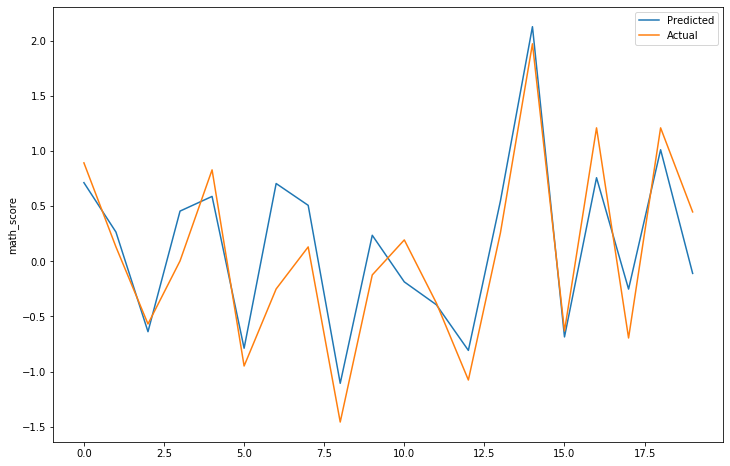

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

In [32]:
x = exam_df.drop(['math score', 'writing score'], axis=1)
y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training Score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
print('Testing Score: ', r2_score(y_test, y_pred))

Training Score:  0.9123954115190211
Testing Score:  0.738524012335146
